In [140]:
import matplotlib.pyplot as plt
import numpy as np

In [147]:
class Player:
    def __init__(self, x, y, color, idy):
        self.id = idy
        self.x = x
        self.y = y
        self.color = color
        self.walls = []

    def move_left(self):
        posx = self.x-1
        posy = self.y
        
        for p in players:
            for i in range(len(p.walls)):
                if p.walls[i].x == posx and p.walls[i].y == posy:
                    print("Can't move left, there's a big wall")
                    return
                
        print("Player: ", self.id, "moved left")
        self.x = self.x - 2
                    
    def move_right(self):
        posx = self.x+1
        posy = self.y
        
        for p in players:
            for i in range(len(p.walls)):
                if p.walls[i].x == posx and p.walls[i].y == posy:
                    print("Can't move right, there's a big wall")
                    return
                
        print("Player: ", self.id, "moved right")
        self.x = self.x + 2

    def move_up(self):
        posx = self.x
        posy = self.y-1
        
        for p in players:
            for i in range(len(p.walls)):
                if p.walls[i].x == posx and p.walls[i].y == posy:
                    print("Can't move up, there's a big wall")
                    return
        
        print("Player: ", self.id, "moved up")
        self.y = self.y - 2

    def move_down(self):
        posx = self.x
        posy = self.y+1
        
        for p in players:
            for i in range(len(p.walls)):
                if p.walls[i].x == posx and p.walls[i].y == posy:
                    print("Can't move down, there's a big wall")
                    return
        
        print("Player: ", self.id, "moved down")
        self.y = self.y + 2
    
    def add_wall(self, wall):
        self.walls.append(wall)

    def place_wall(self, x, y):
        n = len(self.walls)
        if x % 2 == 0 and y % 2 == 0: #only in odd can place a wall
            print("Can't place a wall")
            return
        cont = 0
        for i in range(n):
            if (self.walls[i].used == False):
                self.walls[i].used = True
                self.walls[i].x = x
                self.walls[i].y = y
                print("Player", self.id, "has:", n - (cont + 1), "walls left")
                break
            else:
                cont+=1

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


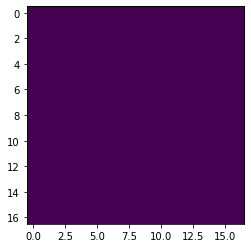

In [153]:
matris = """
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
"""
m = [[int(c) for c in line] for line in matris.strip().split('\n')]
print(np.array(m))
plt.imshow(m)

        

In [149]:
def backtracking(m, x, y, xfinal, yfinal): #MATRIZ Y PLAYER DE ATRIBUTO Y QUE RECORRA TODA LA MATRIZ PARA SABER QUE CAMINO TOMARIA 
    nfilas = len(m)
    ncolumnas = len(m[0])
    
    if x < 0 or x >= nfilas or y < 0 or y >= ncolumnas or m[x][y] != 0: return False 
    if x == xfinal and y == yfinal:
        return True
    
    m[x][y] = 2 #camino visitado 

    nx = x - 2
    ny = y
    if backtracking(m, nx, ny, xfinal, yfinal): return True

    nx = x
    ny = y - 2
    if backtracking(m, nx, ny, xfinal, yfinal): return True

    nx = x
    ny = y + 2 
    if backtracking(m, nx, ny, xfinal, yfinal): return True

    nx = x + 2
    ny = y 
    if backtracking(m, nx, ny, xfinal, yfinal): return True  

    return False
         

In [150]:
backtracking(m, 16,8, 0, 8)

True

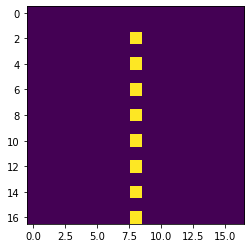

In [151]:
plt.imshow(m)